# Seasonal decomposition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

plt.style.use("seaborn-whitegrid")

/var/folders/ky/4qby95090jbbq38_mh94x72r0000gn/T/ipykernel_36937/2411402289.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## Get data

In [2]:
from glob import glob
import json
import pathlib

data_path = pathlib.Path.cwd() / "data"
path_hist_int = data_path / "historic_intensity"
filepaths = list(glob(str(path_hist_int / "*/*/*.json")))

rows = []
for filepath in filepaths:
    with open(filepath) as f:
        json_data = json.load(f)["data"]
        header = {"postcode": json_data["postcode"]}
        date_data = json_data["data"]
        for item in date_data:
            header["date_from"] = item["from"]
            header["date_to"] = item["to"]
            header["intensity"] = item["intensity"]["forecast"]
            for fuel_type in item["generationmix"]:
                rows.append(
                    {**header, "fuel": fuel_type["fuel"], "perc": fuel_type["perc"]}
                )
df_hist_inten = (
    pd.DataFrame(rows)
    .drop_duplicates()
    .assign(date_from=lambda x: pd.to_datetime(x["date_from"]))
    .assign(date_to=lambda x: pd.to_datetime(x["date_to"]))
    .sort_values(["postcode", "date_from", "fuel"])
)
df_hist_inten


,postcode,date_from,date_to,intensity,fuel,perc
452790,RG21,2018-05-10 23:30:00+00:00,2018-05-11 00:00:00+00:00,298,biomass,6.5
452791,RG21,2018-05-10 23:30:00+00:00,2018-05-11 00:00:00+00:00,298,coal,0.0
452793,RG21,2018-05-10 23:30:00+00:00,2018-05-11 00:00:00+00:00,298,gas,32.4
452796,RG21,2018-05-10 23:30:00+00:00,2018-05-11 00:00:00+00:00,298,hydro,1.4
452792,RG21,2018-05-10 23:30:00+00:00,2018-05-11 00:00:00+00:00,298,imports,21.3
...,...,...,...,...,...,...
3026,RG21,2022-10-23 23:30:00+00:00,2022-10-24 00:00:00+00:00,171,imports,16.7
3028,RG21,2022-10-23 23:30:00+00:00,2022-10-24 00:00:00+00:00,171,nuclear,5.4
3029,RG21,2022-10-23 23:30:00+00:00,2022-10-24 00:00:00+00:00,171,other,0.0
3031,RG21,2022-10-23 23:30:00+00:00,2022-10-24 00:00:00+00:00,171,solar,0.0


Plot intensity

<AxesSubplot: xlabel='date_from'>

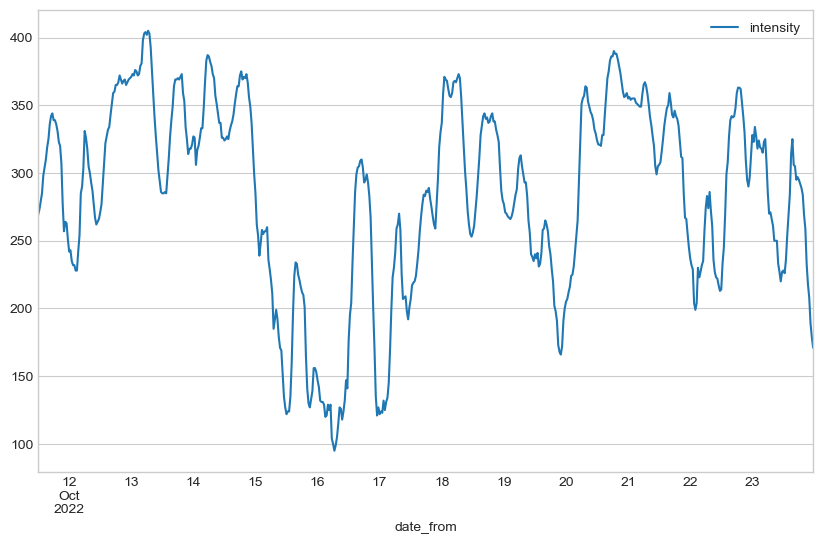

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
df_hist_inten[['date_from','intensity']].drop_duplicates().set_index('date_from').sort_index().iloc[-600:].plot(ax=ax)

Long time average

/var/folders/ky/4qby95090jbbq38_mh94x72r0000gn/T/ipykernel_36937/2793200146.py:2: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  df_hist_inten[["date_from", "intensity"]].drop_duplicates().set_index(


<AxesSubplot: xlabel='date_from'>

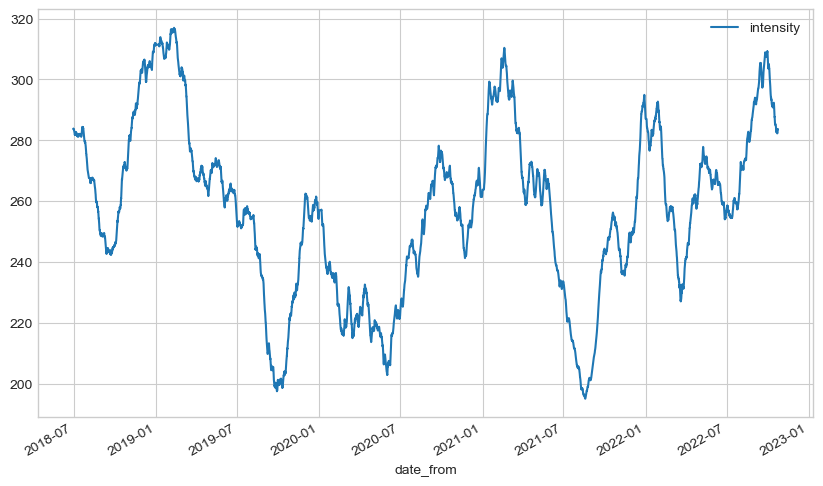

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
df_hist_inten[["date_from", "intensity"]].drop_duplicates().set_index(
    "date_from"
).rolling(window=24 * 100).mean(skipna=True).sort_index().plot(ax=ax)


Plot fuel mix

<AxesSubplot: xlabel='date_from'>

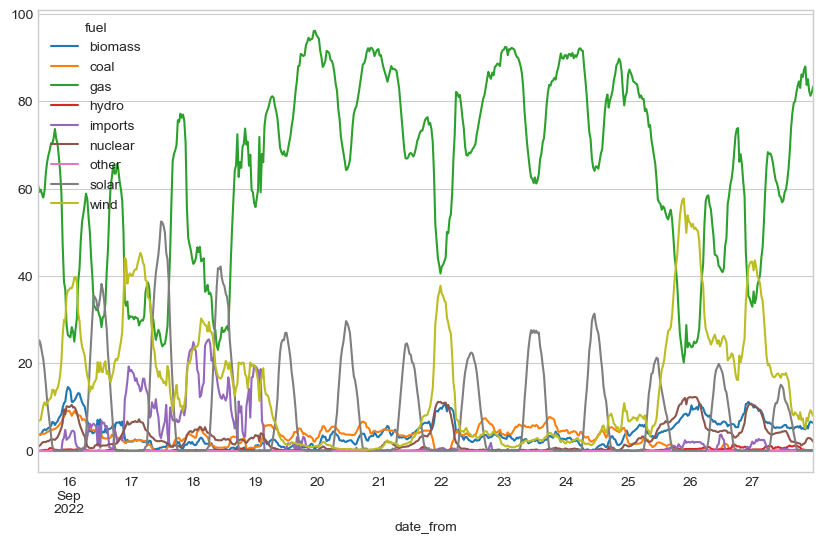

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df_hist_inten_piv = df_hist_inten.pivot(index='date_from', columns='fuel', values='perc')
df_hist_inten_piv.iloc[-600:].plot(ax=ax)

/var/folders/ky/4qby95090jbbq38_mh94x72r0000gn/T/ipykernel_36937/270388463.py:3: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  df_hist_inten_piv.rolling(window=24*200).mean(skipna=True).plot(ax=ax)


<AxesSubplot: xlabel='date_from'>

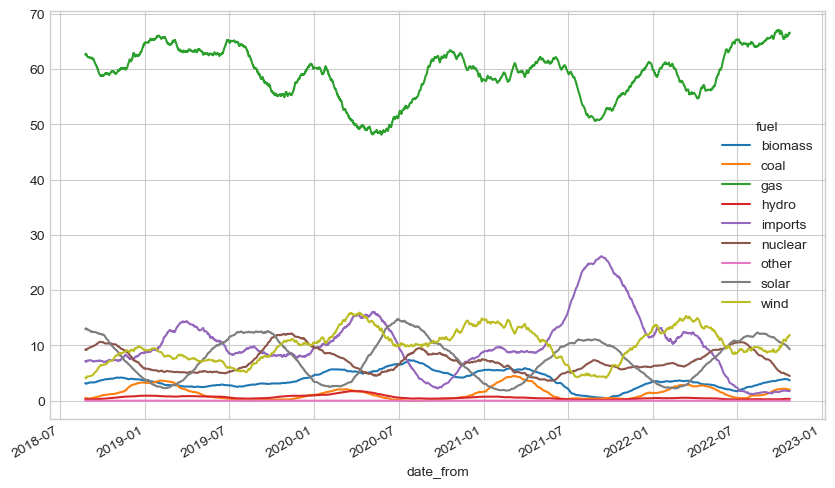

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
df_hist_inten_piv = df_hist_inten.pivot(index='date_from', columns='fuel', values='perc')
df_hist_inten_piv.rolling(window=24*200).mean(skipna=True).plot(ax=ax)